### Problem Statement

1. Find various trends and patterns in the reviews data, create useful insights that best describe the product quality.
2. Classify each review based on the sentiment associated with the same.

### Project Objective

In this project, the customer review data generated by an e-commerce company will be analyzed 
to gain useful insights from the up-votes and/or down-votes of its teaming customers. It is hoped 
that the uncovered insights and the recommendations that will be generated from the analysis will 
greatly assist the company in refocusing its operations to respond to the needs of her customers.

Natural Language Processing (NLP) will be employed for the analysis. NLP helps us understand 
the structure and meaning of human language through the analysis of syntax, semantics,
pragmatics, and morphology The linguistic knowledge is transformed structured rule-based machine 
learning algorithm that is able to predict specific outcomes. NLP can be deployed in two major areas, namely: Natural 
Language Understanding and Natural Language Generation. Based on the objective of this project, our focus will be 
on Natural Language Understanding

### Data Description
This dataset contains over 568k of consumer reviews on different products of 
the company.

|Feature | Name Description|
|--------|--------------|
Id |Record ID
ProductId |Product ID
UserId |User ID who posted the review
ProfileName| Profile name of the User
HelpfullnessNumerator |Numerator of the helpfulness of the review
HelpfullnessDenominator |Denominator of the helpfulness of the review
Score |Product Rating
Time |Review time in timestamp
Summary |Summary of the review
Text |Actual text of the review


### Data Preprocessing Steps and Inspiration

#### The preprocessing of the data included the following steps:
1. Loading the eCommerce customer review data.
2. Inspect for missing data and take necessary action as per the following:
a. Remove the rows with missing value if their number is insignificant
b. Replace the missing values with the mean or median if the feature is numeric
3. Calculate the rate of helpfulness by dividing the HelpfulnessNumerator by HelpfulnessDenominator and where the HelpfulnessDenominator is zero, assign a value of -1 to signify negative or no-Helpfulness
4. Create bins and labels for the Helpfulness as follows:
a. Bins: [ -1, 0, 0.2, 0.4, 0.6, 0.8, 1.0]
b. Labels: [‘Null’, ‘0-20%’, ’20-40%, ’40-60%’, ’60-80%’, ’80-100%’]
5. Convert the the feature Time to YYYY-MM-DD time record 
6. Extract the aggregate count of the feature values in each bin based on Score value and store in df_summary
7. Create a pivot Table of the df_summary data for better appreciation/understanding 
8. Create a heatmap of the df_summary for better visualization.<br>
9. Convert the unique Scores [1, 2, 3, 4, 5] into two categories such that:
a. 1 ➔ 4 or 5
b. 0 ➔ 1 or 2
c. 3 ➔ Neutral
➔ Which results in score_dict: {1:0, 2:0, 4:1, 5:1}<br>
10. Since a vote of 3 is considered neutral, it will be excluded from the model training dataset:
a. The Text feature of the data (excluding Score of 3) is stored in X and the Score feature (maped according to the established dictionary → score_dict) is stored in y, the dependent variable.<br>
11. Using module CountVectorizer, the Text feature is converted to vectors and stored in X_vectorized.<br>
12. Using the train_test_split from sklearn model selection module, extract the X_train, X_test, y_train, y_test for the Logistic regression model with data split of 80:20 and random_state of 42.<br>
13. Train the model with LogisticRegression() and obtain predictions and accuracy<br>
14. Although the accuracy result from the LogisticRegression() was okay, the assignment of coefficients to the significant words was not reasonable.<br>
15. To correct the anomaly, Term Frequency — Inverse Document Frequency (TF-IDF), TfidfVectorizer was applied for feature extraction. The resulting accuracy was pratically the same but the coefficient assignment to significant words are now more reasonable.<br>
16. It is observed that the dependent feature y is highly skewed to Score of 5.<br>
17. RandomOverSampler from imblearn was used to fit the train/test data and the resultant was well balanced. <br>
18. To improve our model, We will employ GridSearchCV which is a process of performing hyperparameter tuning in order to determine the optimal values for a given model. GridSearchCV loops through predefined hyperparameters and fit the estimator (model) on the training set. The result is that the best parameters from the listed hyperparameters is selected. With the optimal the model accuracy improved from 93.6 to 98.7% with recall rate of 99% for up-votes and 100% for down-votes.

### Choosing the Algorithm for the Project

The choice for my algorithm for the project was dictated by the project objective which is 
to analyze customer reviews and predict the direction of their votes in either up-vote (1) 
or down-vote (0). This is therefore a classical classification problem which Logistic 
Regression algorithm handles very well with proven accuracy of better than 90% in most
cases.<br>
Logistic Regression which I adopted for the project is a linear regression algorithm for 
Machine Learning specifically engineered to predict the probability of binary categorical 
dependent features consisting of either [Yes or No], [Pass or Fail] vote and which could 
be translated to 0 or 1.

### Assumptions

The Logistic Regression algorithm is based on some assumptions which include the 
following:
1. Sample size: It needs large sample size for reliable prediction
which this project satisfies with over 586K records . The empirical
rule of thumb is minimum 20 samples for every independent 
variable.
2. Linear relationship: The independent variables (X) have a linear relation with the 
dependent variable (y). It’s assumed that each customer voted individually and was
not influenced.
3. Multicollinearity There should be minimal relationship 
(multicollinearity ) between observations the independent 
variables.
4. Autocorrelation: There should be minimal or no relation ship 
between data points o f any given feature which implies that all
data point s of an independent feature in a sample should be 
independent of each other.

### Model Evaluation and Technique

The model evaluation technique includes the following steps:
1. Import libraries
2. Load dataset
3. Perform EDA
4. Perform data cleaning by removing null values
5. Prepare data by calculating Help rate by dividing the HelpfulnessNumerator by HelpfulnessDenominator.
6. Drop rows with scores of 3 which are considered neutral votes
7. Replaced null values with -1. indicating that there was no vote.
• Creating bins to segment the Help rate:
• [ 'Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%' ]
8. Create Pivot Table
9. Plot heatmap of the pivot Table, for better visualizations
10. Convert the Scores into 2 categories:
• 0 (negative or down votes) for scores of 1 or 2 and 
• 1 (positive or up votes) for scores of 4 or 5
11. Create a dictionary of the scores: score_dict = { 1:0, 2:0, 4:1,5:1}
12. Using the map() function, map the scores to the dataset using the scores dictionary from line 10.
13. Model Training: Two approaches were implemented to find the best accuracy:

I. First Approach:<br>
a. NLP: CountVectorizer() to transform the Text column (X) into vectors based on the number of occurrences of the word in the text.<br>
b. Split data (X_vectorized, y) into train & test<br>
c. Model training with LogisticRegression<br>
d. Predictions <br>
e. Compute model accuracy → model accuracy was 93.5%
14. Two observations were made after the first approach: (1) certain significant coefficients didn’t make much sense, and (2) the train data was skewed in favor of the positive votes.
15. A second approach was implement to correct the anomalies.

II. Second Approach: 
a. NLP: TfidfVectorizer() <br>
b. Split data (X_vectorized, y) into train & test <br>
c. Apply RandomOverSampler() to balance train data <br>
d. Apply GridSearchCV with LogisticRegression to perform hyperparameter tuning <br>
e. Train the Model <br>
f. Predictions <br>
g. Model Accuracy → model accuracy was 98.7% <br>
h. Obtain Classification Report

### Inferences from the Project

Model Accuracy: 98.7%

Precision of the up-votes of 1.0 implies that 100% of the customers who had positive reviews (up-votes) were correctly identified. This is also supported by the recall (percentage of correct positive predictions) and f1-score (the weighted harmonic mean of precision and recall) which are each99%

However, only 58% of the down-votes were correctly identified which means that the model is highly skewed towards the positive reviews(up-votes).

Support: This is the number of actual occurrences of the classinthedataset. The support values of 542(1,75%) for the negative reviews(down-votes) when compared to 30,344(98.75%) for the positive reviews demonstrates the skewness of the data set towards positive reviews.

It is also noted that more than half of there views had no vote.

The model result shows that many customershad
positivereviews(opinions)aboutthecompany.


### Future Possibilities of the Project

This project has exposed us to the power of Natural language processing (NLP) technology 
which was able to analyze over five hundred thousand consumer review records to come
up with a conclusive direction of the majority of the opinion votes (positive or negative) in 
the report. This task would ordinarily be almost impossible and very time consuming for 
humans to achieve.

NLP, a subfield of Artificial Intelligence (AI) enables machines to efficiently understand and 
interpret human languages. The future possibilities of this technology are endless as is
demonstrated by the cutting-edge AI applications based on the technology currently in the 
market. These applications include:
1. NLP-powered Digit Assistant: these applications can literarily communicate just like 
humans, interpret human languages and perform specific assigned tasks. The 
leading applications in this area currently are Siri (Apple), Ok Google (Google), 
Cortana (Microsoft), and Alexa (Amazon).

2. Interactive Voice Recognition (IVR): This is one of the significant examples of NLP 
systems in the industry today. It serves as gate-keeper or interphase between a 
company and its customers, receiving and analyzing calls and routing the calls if 
necessary to the appropriate person. Almost all major organizations have deployed 
IVR to collect data from callers, analyze and route the calls

The future of natural language processing in AI promises to be thrilling. It’s predicted that
technology advancements in this area will be very exciting in light of innovations derived 
from the combinations of AI, NLP, Internet of Things (IoT), and ML. NLP technology will 
play a major role in the implementation of gesture and facial recognition apps, which scope 
is promising in the very near future.

### Capstone Project - e-Commerce Company
reference- Richard Urma

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## EDA

##### Helper Functions

In [4]:
# Function to return rounded dbf
def round_val(data):
 for i,j in enumerate(data):
     data[i]=round(j,2)
        
 return (data)
def format_number(number):
 return("{:,}".format(number))


In [10]:
df=pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/Datasets/Reviews (1).csv",engine='python',error_bad_lines=False)
df.head()

Skipping line 73049: unexpected end of data


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df.shape

(73047, 10)

In [12]:
# Examine some of the text data
for i in range(5):
 print(f"Review item {i+1}")
 print(f"Summary: {df['Summary'][i]}")
 print(f"Text : {df['Text'][i]}\n")

Review item 1
Summary: Good Quality Dog Food
Text : I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Review item 2
Summary: Not as Advertised
Text : Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

Review item 3
Summary: "Delight" says it all
Text : This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The W

In [13]:
# Check data types
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73047 entries, 0 to 73046
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      73047 non-null  int64 
 1   ProductId               73047 non-null  object
 2   UserId                  73047 non-null  object
 3   ProfileName             73043 non-null  object
 4   HelpfulnessNumerator    73047 non-null  int64 
 5   HelpfulnessDenominator  73047 non-null  int64 
 6   Score                   73047 non-null  int64 
 7   Time                    73047 non-null  int64 
 8   Summary                 73045 non-null  object
 9   Text                    73047 non-null  object
dtypes: int64(5), object(5)
memory usage: 5.6+ MB


In [15]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               4
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

In [16]:
#null percentage
(df.isnull().sum()*100)/len(df)

Id                        0.000000
ProductId                 0.000000
UserId                    0.000000
ProfileName               0.005476
HelpfulnessNumerator      0.000000
HelpfulnessDenominator    0.000000
Score                     0.000000
Time                      0.000000
Summary                   0.002738
Text                      0.000000
dtype: float64

In [17]:
#we can remove the rows with null values since the fraction is negligible compared to the size of the dataset
df = df.dropna()
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [18]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,73041.000000,73041.000000,73041.000000,73041.000000,7.304100e+04
mean,36523.498528,1.613943,2.096206,4.148136,1.295086e+09
std,21087.454139,5.484285,6.189824,1.325208,4.809728e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,18261.000000,0.000000,0.000000,4.000000,1.269216e+09
50%,36523.000000,0.000000,1.000000,5.000000,1.309738e+09
75%,54786.000000,2.000000,2.000000,5.000000,1.332115e+09
max,73047.000000,398.000000,401.000000,5.000000,1.351210e+09


In [19]:
df.Score.value_counts()

5    45537
4    10681
1     6916
3     5845
2     4062
Name: Score, dtype: int64

In [20]:
df[df.duplicated()].shape[0]
#no duplicates

0

In [21]:
df.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,0.003649,0.008243,-0.002940,0.009546
HelpfulnessNumerator,0.003649,1.000000,0.954462,-0.040321,-0.187966
HelpfulnessDenominator,0.008243,0.954462,1.000000,-0.124840,-0.204821
Score,-0.002940,-0.040321,-0.124840,1.000000,-0.063256
Time,0.009546,-0.187966,-0.204821,-0.063256,1.000000


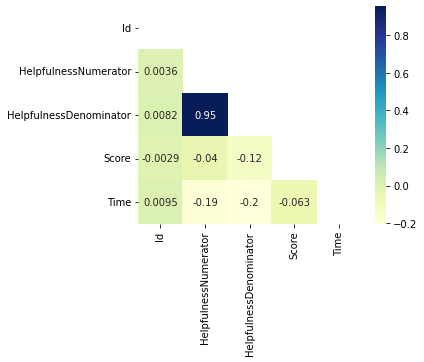

In [22]:
plt.figure(figsize=(5,4))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',mask=mask)
plt.show()

In [23]:
df.corr()['Score']

Id                       -0.002940
HelpfulnessNumerator     -0.040321
HelpfulnessDenominator   -0.124840
Score                     1.000000
Time                     -0.063256
Name: Score, dtype: float64

In [24]:
df.Time

0        1303862400
1        1346976000
2        1219017600
3        1307923200
4        1350777600
            ...    
73042    1260230400
73043    1264809600
73044    1294963200
73045    1328054400
73046    1330128000
Name: Time, Length: 73041, dtype: int64

In [25]:
#converting Time columns to Date format
Time=[]
from datetime import date
for i in df['Time']:
    Time.append(date.fromtimestamp(i))
pd.DataFrame(Time, columns=['Time'])   

,Time
0,2011-04-27
1,2012-09-07
2,2008-08-18
3,2011-06-13
4,2012-10-21
...,...
73036,2009-12-08
73037,2010-01-30
73038,2011-01-14
73039,2012-02-01


In [26]:
df.Time= Time
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [27]:
df[df['HelpfulnessNumerator']==0].shape

(39322, 10)

In [28]:
# define Helpfulness as a measure/rate of how helpful the particular rating was:
# where 1 (100%) would signify vey helpful and  0 not helpful

df['Helpfulness']=df['HelpfulnessNumerator']/df['HelpfulnessDenominator']
df['Helpfulness']


0        1.000000
1             NaN
2        1.000000
3        1.000000
4             NaN
           ...   
73042    0.555556
73043    0.285714
73044         NaN
73045    1.000000
73046         NaN
Name: Helpfulness, Length: 73041, dtype: float64

In [29]:
# For cases where Helpfulness is NAN, meaning the denominator was zero # we will assign -1
df['Helpfulness']=df['Helpfulness'].fillna(-1)
print(format_number(df[df['Helpfulness']==-1].shape[0]))

34,807


In [30]:
df.Helpfulness

0        1.000000
1       -1.000000
2        1.000000
3        1.000000
4       -1.000000
           ...   
73042    0.555556
73043    0.285714
73044   -1.000000
73045    1.000000
73046   -1.000000
Name: Helpfulness, Length: 73041, dtype: float64

In [31]:
df[df['HelpfulnessNumerator']==0].shape

(39322, 11)

In [32]:
df['Helpfulness']=df['HelpfulnessNumerator']/df['HelpfulnessDenominator']
df['Helpfulness']

0        1.000000
1             NaN
2        1.000000
3        1.000000
4             NaN
           ...   
73042    0.555556
73043    0.285714
73044         NaN
73045    1.000000
73046         NaN
Name: Helpfulness, Length: 73041, dtype: float64

In [33]:
# For cases where Helpfulness is NAN, meaning the denominator was zero
# we will assign -1
df['Helpfulness']=df['Helpfulness'].fillna(-1)
print(format_number(df[df['Helpfulness']==-1].shape[0])) #format number puts comma in number and converts it to string

34,807


In [34]:
df['Helpfulness']

0        1.000000
1       -1.000000
2        1.000000
3        1.000000
4       -1.000000
           ...   
73042    0.555556
73043    0.285714
73044   -1.000000
73045    1.000000
73046   -1.000000
Name: Helpfulness, Length: 73041, dtype: float64

In [35]:
Help=df[['HelpfulnessNumerator','HelpfulnessDenominator','Helpfulness','Score','Time']].sort_values \
                                                                (by='HelpfulnessDenominator',ascending=False)
Help.head()


,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time
36478,398,401,0.992519,5,2011-04-05
67262,286,307,0.931596,2,2011-05-05
69023,264,270,0.977778,5,2007-10-20
11802,202,219,0.922374,4,2011-03-10
3305,187,216,0.865741,3,2012-01-06


In [36]:
Help.tail()

,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time
32113,0,0,-1.0,5,2011-09-06
32114,0,0,-1.0,5,2011-06-24
32115,0,0,-1.0,5,2011-05-23
32116,0,0,-1.0,5,2010-05-06
73046,0,0,-1.0,5,2012-02-25


In [37]:
Helpfull=Help[Help['HelpfulnessNumerator']>0 &  (Help['HelpfulnessNumerator'] <= Help['HelpfulnessDenominator']) ]
Helpfull.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time
36478,398,401,0.992519,5,2011-04-05
67262,286,307,0.931596,2,2011-05-05
69023,264,270,0.977778,5,2007-10-20
11802,202,219,0.922374,4,2011-03-10
3305,187,216,0.865741,3,2012-01-06


In [38]:
min(Helpfull.Helpfulness)

0.02702702702702703

In [39]:
max(Helpfull.Helpfulness)

3.0

In [40]:
Helpfull.tail()

,HelpfulnessNumerator,HelpfulnessDenominator,Helpfulness,Score,Time
21879,1,1,1.0,5,2009-04-25
21880,1,1,1.0,5,2009-04-15
21889,1,1,1.0,5,2008-10-24
21876,1,1,1.0,4,2009-05-08
21853,1,1,1.0,5,2009-12-16


In [41]:
help_rate=list(set(Help['Helpfulness'])) #set removes duplicates because set can't have same values more than once
print(f"The help_rate (Helpfulness) has {len(help_rate)} unique values")

The help_rate (Helpfulness) has 401 unique values


In [42]:
help_rate=pd.DataFrame(help_rate, columns=['Help_Rate']).sort_values(by=['Help_Rate'],ascending=False).reset_index(drop=True)
help_rate.head()

,Help_Rate
0,3.000000
1,1.500000
2,1.000000
3,0.992537
4,0.992519


In [43]:
max(help_rate.Help_Rate)

3.0

In [44]:
min(help_rate.Help_Rate)

-1.0

In [45]:
df['Help_Rate']=pd.cut(df['Helpfulness'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], 
 labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
df['Help_Rate']

0        80-100%
1            NaN
2        80-100%
3        80-100%
4            NaN
          ...   
73042     40-60%
73043     20-40%
73044        NaN
73045    80-100%
73046        NaN
Name: Help_Rate, Length: 73041, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [46]:
#getting counts of the features as per the score and help_rate values using aggregate function and count as it parameter
df.groupby(['Score','Help_Rate']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score Help_Rate                                                                
1     Empty       1051       1051    1051         1051                  1051   
      0-20%        322        322     322          322                   322   
      20-40%       644        644     644          644                   644   
      40-60%       881        881     881          881                   881   
      60-80%       817        817     817          817                   817   
      80-100%     1631       1631    1631         1631                  1631   
2     Empty        559        559     559          559                   559   
      0-20%         98         98      98           98                    98   
      20-40%       225        225     225          225                   225   
      40-60%       391        391     391          391                   391   
      60-80%       322        322     322          322                   322   
      80-100%      991        991     991          991                   991   
3     Empty        690        690     690          690                   690   
      0-20%         57         57      57           57                    57   
      20-40%       212        212     212          212                   212   
      40-60%       427        427     427          427                   427   
      60-80%       360        360     360          360                   360   
      80-100%     1476       1476    1476         1476                  1476   
4     Empty        640        640     640          640                   640   
      0-20%         15         15      15           15                    15   
      20-40%       138        138     138          138                   138   
      40-60%       411        411     411          411                   411   
      60-80%       373        373     373          373                   373   
      80-100%     3494       3494    3494         3494                  3494   
5     Empty       1575       1575    1575         1575                  1575   
      0-20%         52         52      52           52                    52   
      20-40%       334        334     334          334                   334   
      40-60%      1356       1356    1356         1356                  1356   
      60-80%      1389       1389    1389         1389                  1389   
      80-100%    17301      17301   17301        17301                 17301   

                 HelpfulnessDenominator   Time  Summary   Text  Helpfulness  
Score Help_Rate                                                              
1     Empty                        1051   1051     1051   1051         1051  
      0-20%                         322    322      322    322          322  
      20-40%                        644    644      644    644          644  
      40-60%                        881    881      881    881          881  
      60-80%                        817    817      817    817          817  
      80-100%                      1631   1631     1631   1631         1631  
2     Empty                         559    559      559    559          559  
      0-20%                          98     98       98     98           98  
      20-40%                        225    225      225    225          225  
      40-60%                        391    391      391    391          391  
      60-80%                        322    322      322    322          322  
      80-100%                       991    991      991    991          991  
3     Empty                         690    690      690    690          690  
      0-20%                          57     57       57     57           57  
      20-40%                        212    212      212    212          212  
      40-60%                        427    427      427    427          427  
      60-80%                        360    360      360

In [47]:
df_summary=df.groupby(['Score','Help_Rate']).agg({'Id':'count'}).reset_index()
df_summary

,Score,Help_Rate,Id
0,1,Empty,1051
1,1,0-20%,322
2,1,20-40%,644
3,1,40-60%,881
4,1,60-80%,817
5,1,80-100%,1631
6,2,Empty,559
7,2,0-20%,98
8,2,20-40%,225
9,2,40-60%,391


In [48]:
# Create Pivot Table for better appreciation
pivot_summary=df_summary.pivot(index='Help_Rate',columns='Score')
pivot_summary

Id                        
Score         1    2     3     4      5
Help_Rate                              
Empty      1051  559   690   640   1575
0-20%       322   98    57    15     52
20-40%      644  225   212   138    334
40-60%      881  391   427   411   1356
60-80%      817  322   360   373   1389
80-100%    1631  991  1476  3494  17301

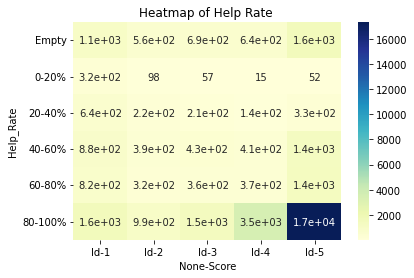

In [49]:
# Create heatmap of it, for better Visualizations
sns.heatmap(pivot_summary, annot=True , cmap = 'YlGnBu')
plt.title('Heatmap of Help Rate ')
plt.show()

In [50]:
# Key message from above:
# Reviews are skewed towards positive 
# Many people had up-vote, score 5 reviews
# More than half of the reviews had zero votes 

In [51]:
score_list=list(set(df['Score'].unique()))
score_list

[1, 2, 3, 4, 5]

Note:
The Scores will be converted into two categories, viz:<br>
 1 for Scores of 4 or 5<br>
 0 for Scores of 1 or 2<br>
 Scores of 3 are Neutral scores and will be excluded
 
==> Score_dict={1:0, 2:0, 4:1, 5:5}

In [52]:
# Converting the Scores into 2 categories 0 & 1
# The map() function takes two inputs as a function and an iterable object. 
# The function that is given to map() is a normal function, and it will 
# iterate over all the values present in the iterable object given.
dbf = df[df['Score'] != 3] # Exclude Scores of 3
X = dbf['Text']
Score_dict = {1:0, 2:0, 4:1, 5:1} 
y = dbf['Score'].map(Score_dict)

In [53]:
y

0        1
1        0
2        1
3        0
4        1
        ..
73042    0
73043    0
73044    1
73045    1
73046    1
Name: Score, Length: 67196, dtype: int64

In [54]:
X.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [55]:
# Convert text to vectors using NLP
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words = 'english')

In [56]:
#Using module CountVectorizer, the Text feature is converted to vectors and stored in X_vectorized.
X_vectorized = count_vect.fit_transform(X)

In [57]:
print(f"Number of features: {format_number(X_vectorized.shape[1])}")

Number of features: 46,276


In [58]:
print(X_vectorized[0])

  (0, 7230)	1
  (0, 44337)	1
  (0, 8380)	1
  (0, 14237)	1
  (0, 17667)	1
  (0, 32693)	1
  (0, 19219)	1
  (0, 33350)	1
  (0, 32687)	2
  (0, 25121)	1
  (0, 24745)	1
  (0, 39416)	1
  (0, 32647)	1
  (0, 26290)	1
  (0, 38004)	1
  (0, 6450)	2
  (0, 24100)	1
  (0, 17148)	1
  (0, 3444)	1


### Some Helper Functions

In [59]:
# ML model Training ---> will be called with different model functions
def model_fit(X, y, NLP_model, ML_model, show_coeff=1):
    X_vectorized = NLP_model.fit_transform(X)
    print(f"Number of features: {format_number(X_vectorized.shape[1])}")
 
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y,  test_size=0.2, random_state=42)
 
    print(f' Training records(X_train): {format_number(X_train.shape[0])}')
    print(f' Test records(X_test) : {format_number(X_test.shape[0])}')
 
    ML = ML_model.fit(X_train, y_train)
    accuracy = ML.score(X_test, y_test)
    print (f'Model Accuracy: {round(accuracy*100,2)}%'); 
 
    if show_coeff == 1:
        word = NLP_model.get_feature_names()
        coeff = ML.coef_.tolist()[0]
 
        coeff_df = pd.DataFrame(zip(word, coeff),columns=['Word', 'Coefficeient']).sort_values(['Coefficeient', 'Word'], \
                                                                                               ascending=False) 
        print('\n')
        print("\n===== Top 20 Positives =====")
        print(coeff_df[['Word','Coefficeient']].head(20).to_string(index=False))
        print('\n')
        print("===== Top 20 Negatives =====")
        print(coeff_df[['Word','Coefficeient']].tail(20).to_string(index=False))

In [60]:
# Prediction Function
def model_predict(X, y, NLP_model, ML_model):
    X_vectorized = NLP_model.fit_transform(X)
    print(f"Number of features: {format_number(X_vectorized.shape[1])}")
 
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, 
    random_state=42, test_size=0.2)
    print(f' Training records(X_train): {format_number(X_train.shape[0])}')
    print(f' Test records(X_test) : {format_number(X_test.shape[0])}')
 
    ML = ML_model.fit(X_train, y_train)
    predictions=ML.predict(X_test)
    CM=confusion_matrix(predictions,y_test) # Confusion Matrix
 
    print("\nConfusion Matrix:\n",CM,"\n")
    accuracy=accuracy_score(predictions,y_test)
    print (f'Model Accuracy: {round(accuracy*100,2)}%');
    print(f"\nClassification Report:\n {classification_report(y_test, predictions)}")

### The ML Model

In [61]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, random_state=42, test_size=0.2)

In [62]:
print(f' Training records(X_Train): {format_number(X_train.shape[0])}')

 Training records(X_Train): 53,756


In [63]:
#Model Training
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [64]:
model_fit(X, y, count_vect, LogisticRegression())

Number of features: 46,276
 Training records(X_train): 53,756
 Test records(X_test) : 13,440
Model Accuracy: 92.06%



===== Top 20 Positives =====
      Word  Coefficeient
     yummy      2.296208
    hooked      2.260262
   worried      2.041067
    corner      1.998558
 satisfied      1.988891
   amazing      1.921753
pleasantly      1.918697
 excellent      1.913892
   perfect      1.900047
  terrific      1.865514
   pleased      1.857247
 delicious      1.856402
   awesome      1.810196
 wonderful      1.774933
 depending      1.773372
    brings      1.753272
     penny      1.751342
 skeptical      1.720787
    smooth      1.710112
      beat      1.708998


===== Top 20 Negatives =====
          Word  Coefficeient
         sorry     -1.765546
          died     -1.796111
      horrible     -1.799878
       allegro     -1.811558
    interested     -1.845660
         trash     -1.862743
       sounded     -1.878411
    flavorless     -1.941919
          yuck     -1.964580
      

In [65]:
# Load the necessary modules for prediction
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [66]:
# Get predictions with LogisticRegression model

model_predict(X,y,count_vect, logistic)

Number of features: 46,276
 Training records(X_train): 53,756
 Test records(X_test) : 13,440

Confusion Matrix:
 [[ 1496   364]
 [  703 10877]] 

Model Accuracy: 92.06%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.74      2199
           1       0.94      0.97      0.95     11241

    accuracy                           0.92     13440
   macro avg       0.87      0.82      0.85     13440
weighted avg       0.92      0.92      0.92     13440



In [67]:
# Accuracy is around 93.7% - not bad. 
# However we notice that some of those significant coefficients are not meaningful
# Use dummy classifier to rectify the anomaly
from sklearn.dummy import DummyClassifier

In [68]:
# Train the model with DummyClassifier
model_fit(X, y, count_vect, DummyClassifier(), 0)

Number of features: 46,276
 Training records(X_train): 53,756
 Test records(X_test) : 13,440
Model Accuracy: 83.64%


#### TfidfVectorizer
TfidfVectorizer is a class in the scikit-learn library for Python that is used to convert a collection of raw text documents into a matrix of TF-IDF features. The acronym TF-IDF stands for "Term Frequency-Inverse Document Frequency," and it is a measure of the importance of a word in a document relative to an entire corpus of documents.

The "term frequency" (TF) component of the TF-IDF score measures how often a word appears in a document, while the "inverse document frequency" (IDF) component measures the rarity of the word across all documents in the corpus. Together, the TF and IDF scores can be used to identify the words that are most "important" or informative in a given document.

The TfidfVectorizer can also have additional parameters such as 'ngram_range' to include n-grams, 'max_df' and 'min_df' to ignore terms that have a document frequency strictly higher or lower than the given thresholds.
It can also have parameters such as 'stop_words' to remove common english stop words, and also can use 'token_pattern' to tokenize the string, by default it uses regular expressions '\b[a-zA-Z]\b'.

In [69]:
# Term Frequency — Inverse Document Frequency (TF-IDF) model
# Logistic regression model on TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(stop_words = 'english')
model_fit(X, y, tf_idf, LogisticRegression())

Number of features: 46,276
 Training records(X_train): 53,756
 Test records(X_test) : 13,440
Model Accuracy: 91.55%



===== Top 20 Positives =====
     Word  Coefficeient
    great     10.433266
     best      8.058934
delicious      7.701636
  perfect      6.909020
    loves      6.416030
     love      6.232285
     nice      6.201289
excellent      6.072740
     good      6.063315
wonderful      5.673236
 favorite      5.022209
  amazing      5.013285
   highly      4.832379
    yummy      4.553122
  pleased      4.290909
   smooth      4.283616
  awesome      4.252887
     easy      4.204084
     glad      3.877129
    thank      3.681581


===== Top 20 Negatives =====
          Word  Coefficeient
    disgusting     -3.949000
         sorry     -3.980030
           bad     -4.049505
         stale     -4.073492
         china     -4.074751
         bland     -4.283193
         threw     -4.369505
         waste     -4.385775
disappointment     -4.496056
          weak     -4.62170

Accuracy roughly the same, 93.6%. However, the significant words make much more
sense now, with higher coefficient magnitude as well!

In [70]:
# Help_Rate Prediction --> since the score vote of 3 are neutral reviews, 
# we will get rid of all votes with score of 3
df_main = df[df['Score'] == 5]
df_main.shape

(45537, 12)

In [74]:
data = df_main[df_main['Help_Rate'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data.shape


(19076, 12)

In [75]:
X = data['Text']
X.head()

0     I have bought several of the Vitality canned d...
8     Right now I'm mostly just sprouting this so my...
10    I don't know if it's the cactus or the tequila...
11    One of my boys needed to lose some weight and ...
14    The Strawberry Twizzlers are my guilty pleasur...
Name: Text, dtype: object

In [76]:
score_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data['Help_Rate'].map(score_dict)
print(y)

0        1.0
8        1.0
10       1.0
11       1.0
14       1.0
        ... 
73035    1.0
73036    1.0
73037    1.0
73038    1.0
73045    1.0
Name: Help_Rate, Length: 19076, dtype: float64


In [77]:
y_values=y.value_counts()
pd.DataFrame(y_values.values, index=y_values.index, 
 columns=['Score:------->Total _Count'])

,Score:------->Total _Count
1.0,18690
0.0,386


In [78]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
# The target class 'y' is highly skewed , we will observe that positive 
# upvotes(151719, 98.2%) are too much higher than negative 
# votes(2707, 1.8%) there is therefore need to resample the data for 
# improved balance:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
TF_Id = TfidfVectorizer()

In [81]:
X_tf = TF_Id.fit_transform(X)

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_tf,y, test_size=0.2,random_state=3)

In [83]:
y_test.value_counts()

1.0    3740
0.0      76
Name: Help_Rate, dtype: int64

In [84]:
## RandomOverSampler to handle imbalanced data
#import imblearn
from imblearn.over_sampling import RandomOverSampler

#### RandomOverSampler
RandomOverSampler is a method of oversampling that is implemented in the imbalanced-learn library for Python. It is used to balance class distributions by randomly duplicating instances from the under-represented class. This method can be used when the original data set has a class imbalance, meaning that one class has significantly more instances than the other class.

The RandomOverSampler generates new instances by randomly selecting examples from the minority class and adding them to the original data set until the desired balance is achieved. This method can be useful when the amount of data is limited, but it also increases the chance of overfitting as it might create duplicate data points. This method is also sensitive to noise in the data, if the minority class is noisy, oversampling it will create noisy data points.

It's important to note that oversampling the minority class alone is not always sufficient and it might be needed to combine it with undersampling the majority class using techniques such as RandomUnderSampler, or using combination of over- and under-sampling techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to balance class distribution.

In [85]:
r_o_s = RandomOverSampler()

In [86]:
X_train_resampled, y_train_resampled = r_o_s.fit_resample(X_tf, y)

In [87]:
print(f"X_train(resampled) {X_train_resampled.shape} | ", end=" ")
print(f"y_train(resampled) {y_train_resampled.shape}") 

X_train(resampled) (37380, 27870) |  y_train(resampled) (37380,)


In [88]:
from collections import Counter

In [89]:
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()
#X_train = X_train_resampled
#y_train = y_train_resampled
clf=log_class.fit(X_train_resampled, y_train_resampled)

In [90]:
y.value_counts()

1.0    18690
0.0      386
Name: Help_Rate, dtype: int64

In [91]:
# Original X_train values before Oversampling
y_values=y_train.value_counts()
pd.DataFrame(y_values.values, index=y_values.index, columns=['Score:------->y_train: Total _Count'])

,Score:------->y_train: Total _Count
1.0,14950
0.0,310


In [92]:
# Original X_train values after Oversampling
y_values=y_train_resampled.value_counts()
pd.DataFrame(y_values.values, index=y_values.index, columns=['Score:------->y_train: Total _Count'])

,Score:------->y_train: Total _Count
1.0,18690
0.0,18690


In [93]:
print(f'Original dataset shape {Counter(y_train)}')
print(f'Resampled dataset shape {Counter(y_train_resampled)}')

Original dataset shape Counter({1.0: 14950, 0.0: 310})
Resampled dataset shape Counter({1.0: 18690, 0.0: 18690})


#### GridSearchCV
GridSearchCV is a class in the scikit-learn library for Python that is used to perform an exhaustive search over a specified parameter space for an estimator. The goal of GridSearchCV is to find the set of parameters that results in the best performance for a given scoring metric. The user specifies the estimator, a parameter grid, and a scoring metric, and the GridSearchCV class will train and evaluate the estimator for each combination of parameters in the grid, then return the set of parameters that resulted in the highest score.

The parameter grid is a dictionary where the keys are the names of the parameters and the values are lists of the parameter settings to be searched. The scoring metric can be specified by passing a string with the scoring method, such as "accuracy" or "f1", or by passing a callable function that takes an estimator and a set of test data as input and returns a score.

GridSearchCV also provides a way to train the model using cross-validation, by specifying the 'cv' parameter. This parameter can take an integer value, indicating the number of folds to be used for cross-validation or a callable function returning a generator for the splits.

It's important to mention that GridSearchCV can be computationally expensive especially when the data set is large or the search space is big. One alternative approach to consider is RandomizedSearchCV which uses random sampling of the parameter space instead of an exhaustive search.

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
# define a set of grid parameters to iterate
param_grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
# GridSearch with LogisticRegression --> log_class
grid = GridSearchCV(log_class, param_grid, refit = True, verbose = 3,n_jobs=-1) 

In [98]:
# Train the model with the new hyper-parameters and predict
# Predict
# Find the accuracy
# Show classification report
grid.fit(X_train_resampled, y_train_resampled) 
grid_predictions = grid.predict(X_test) 
accuracy = accuracy_score(y_test, grid_predictions)
# print best parameter after tuning 
print(grid.best_params_)
print(f"\nConfusion Matrix:\n {confusion_matrix(y_test,grid_predictions)}")
print (f'\nModel Accuracy: {round(accuracy*100,2)}%');
print()
# print classification report 
print(f"Classification Report:\n {classification_report(y_test, grid_predictions)}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 100.0, 'penalty': 'l2'}

Confusion Matrix:
 [[  76    0]
 [   0 3740]]

Model Accuracy: 100.0%

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00      3740

    accuracy                           1.00      3816
   macro avg       1.00      1.00      1.00      3816
weighted avg       1.00      1.00      1.00      3816



In [99]:
#More balance results and predictions with optimal hyper-parameters of {'C':100}

recall = TP / (TP + FN)

The recall is the measure of our model correctly identifying True Positives.
Thus, for all the customers who actually had a vote of 5, recall tells us how many
we correctly identified as customers who had an up-vote (score=5). in this instance,
99% of customers who had an up-vote were correctly identified

precision of class 0 = TP of class 0/total number of object
The precision of our model is 100%! which implies that when it predicts that a
customer has up-vote(4 or 5) it is most of the time.

 precision of class 1 = TP of class 1/total number of object
 
 macro average = (precision of class 0 + precision of class 1)/2
 
weighted average is precision of all classes merge together
weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total
number of class 1)

TP FN [ 542   0]
FP TN [ 433  29911]

f1-score is a measure of a model's accuracy on a dataset
a good F1 score means that you have low false positives and low false negatives,
Accuracy is used when the True Positives and True negatives are more important while
f1-score is used when the False Negatives and False Positives are crucial.
Support is the number of actual occurrences of the class in the specified dataset.